In [1]:
pip install tensorflow numpy pandas matplotlib

In [2]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import LSTM, Dense
 from sklearn.preprocessing import MinMaxScaler
 from sklearn.model_selection import train_test_split

In [3]:
data = pd.DataFrame({'value': np.sin(np.linspace(0, 50, 100)) + np.random.normal(0, 0.1, 100)})

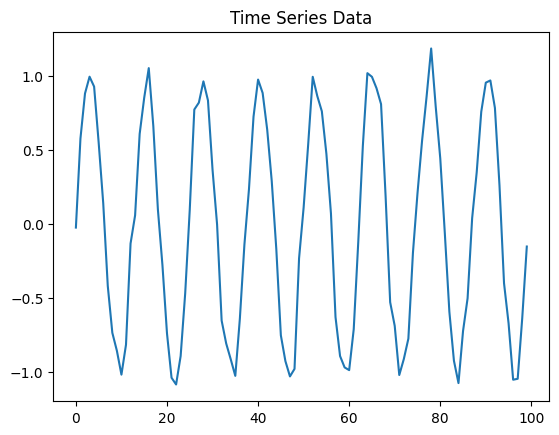

In [4]:
 plt.plot(data['value'])
 plt.title("Time Series Data")
 plt.show()

In [5]:
 scaler = MinMaxScaler(feature_range=(0, 1))
 scaled_data = scaler.fit_transform(data[['value']])

In [7]:
def create_sequences(data, sequence_length):
    # Indent the lines within the function body
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 10
X, y = create_sequences(scaled_data, sequence_length)

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
 model = Sequential()
 model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
 model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
 model.compile(optimizer='adam', loss='mse')

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=16)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.2987 - val_loss: 0.2729
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2171 - val_loss: 0.2355
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2049 - val_loss: 0.1982
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1611 - val_loss: 0.1649
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1185 - val_loss: 0.1394
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1122 - val_loss: 0.1289
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1095 - val_loss: 0.1238
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1115 - val_loss: 0.1160
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0991 - val_loss: 0.1113
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1007 - val_loss: 0.1051
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0932 - val_loss: 0.0968
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0820 - val_loss: 0.0906


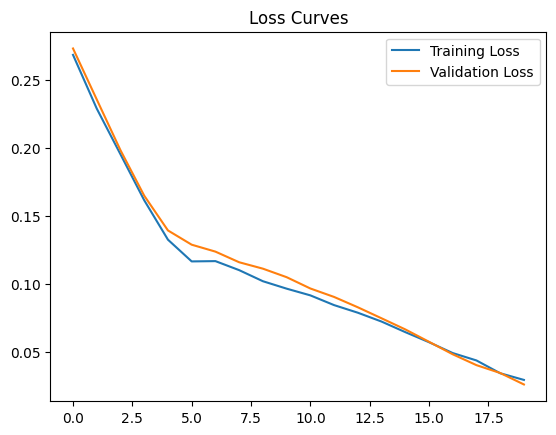

In [12]:
 plt.plot(history.history['loss'], label='Training Loss')
 plt.plot(history.history['val_loss'], label='Validation Loss')
 plt.legend()
 plt.title("Loss Curves")
 plt.show()

In [13]:
 y_pred = model.predict(X_test)
 y_pred = scaler.inverse_transform(y_pred)
 y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


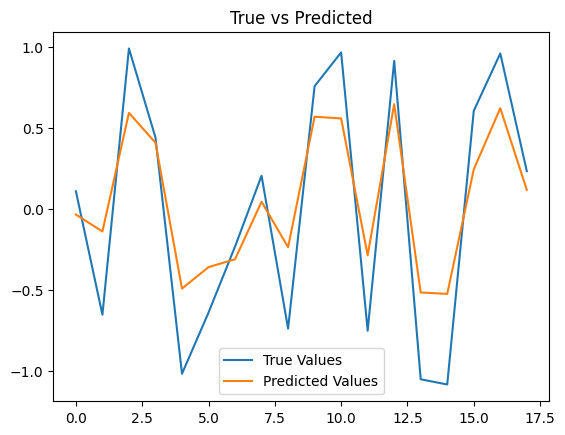

In [15]:
plt.plot(y_test_original, label='True Values')
plt.plot(y_pred, label='Predicted Values') # Removed the extra space at the beginning of this line
plt.legend()
plt.title("True vs Predicted")
plt.show()

In [16]:
 model.save("lstm_model.h5")